## Data Description

Context

Content

Inspiration

To Calculate The Happiness Score

In [55]:
# Importing the libraries
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [56]:
df=pd.read_csv('happiness_score_dataset.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [57]:
df.shape

(158, 12)

In [58]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [59]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [78]:
# Here To predict Happiness Score and Happiness Rank ,Region and Country not required
df_new=df.drop(["Country","Region","Happiness Rank"],axis=1)
df_new.head()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [79]:
# Checking if there is any null value
df_new.isnull().sum()

Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

## Checking Correlation

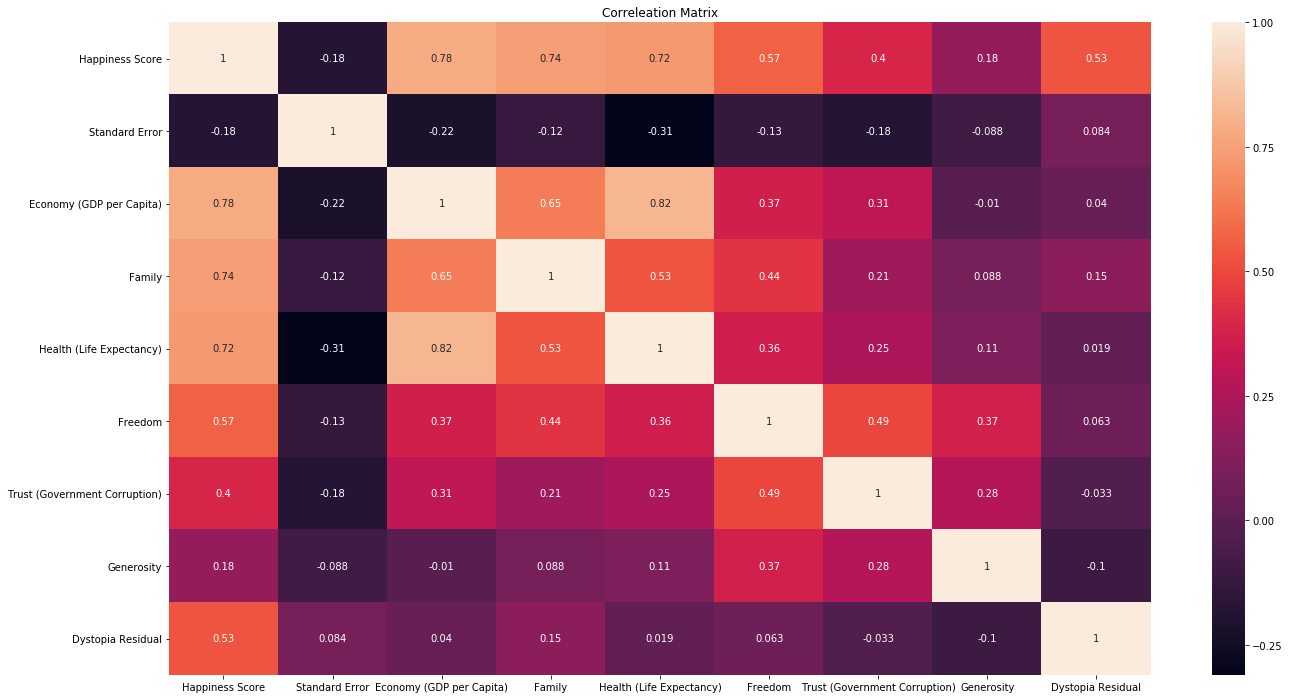

In [80]:
corr_mat=df_new.corr() #Example of Multivariate Analysis
plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot=True)
plt.title("Correleation Matrix")
plt.show()

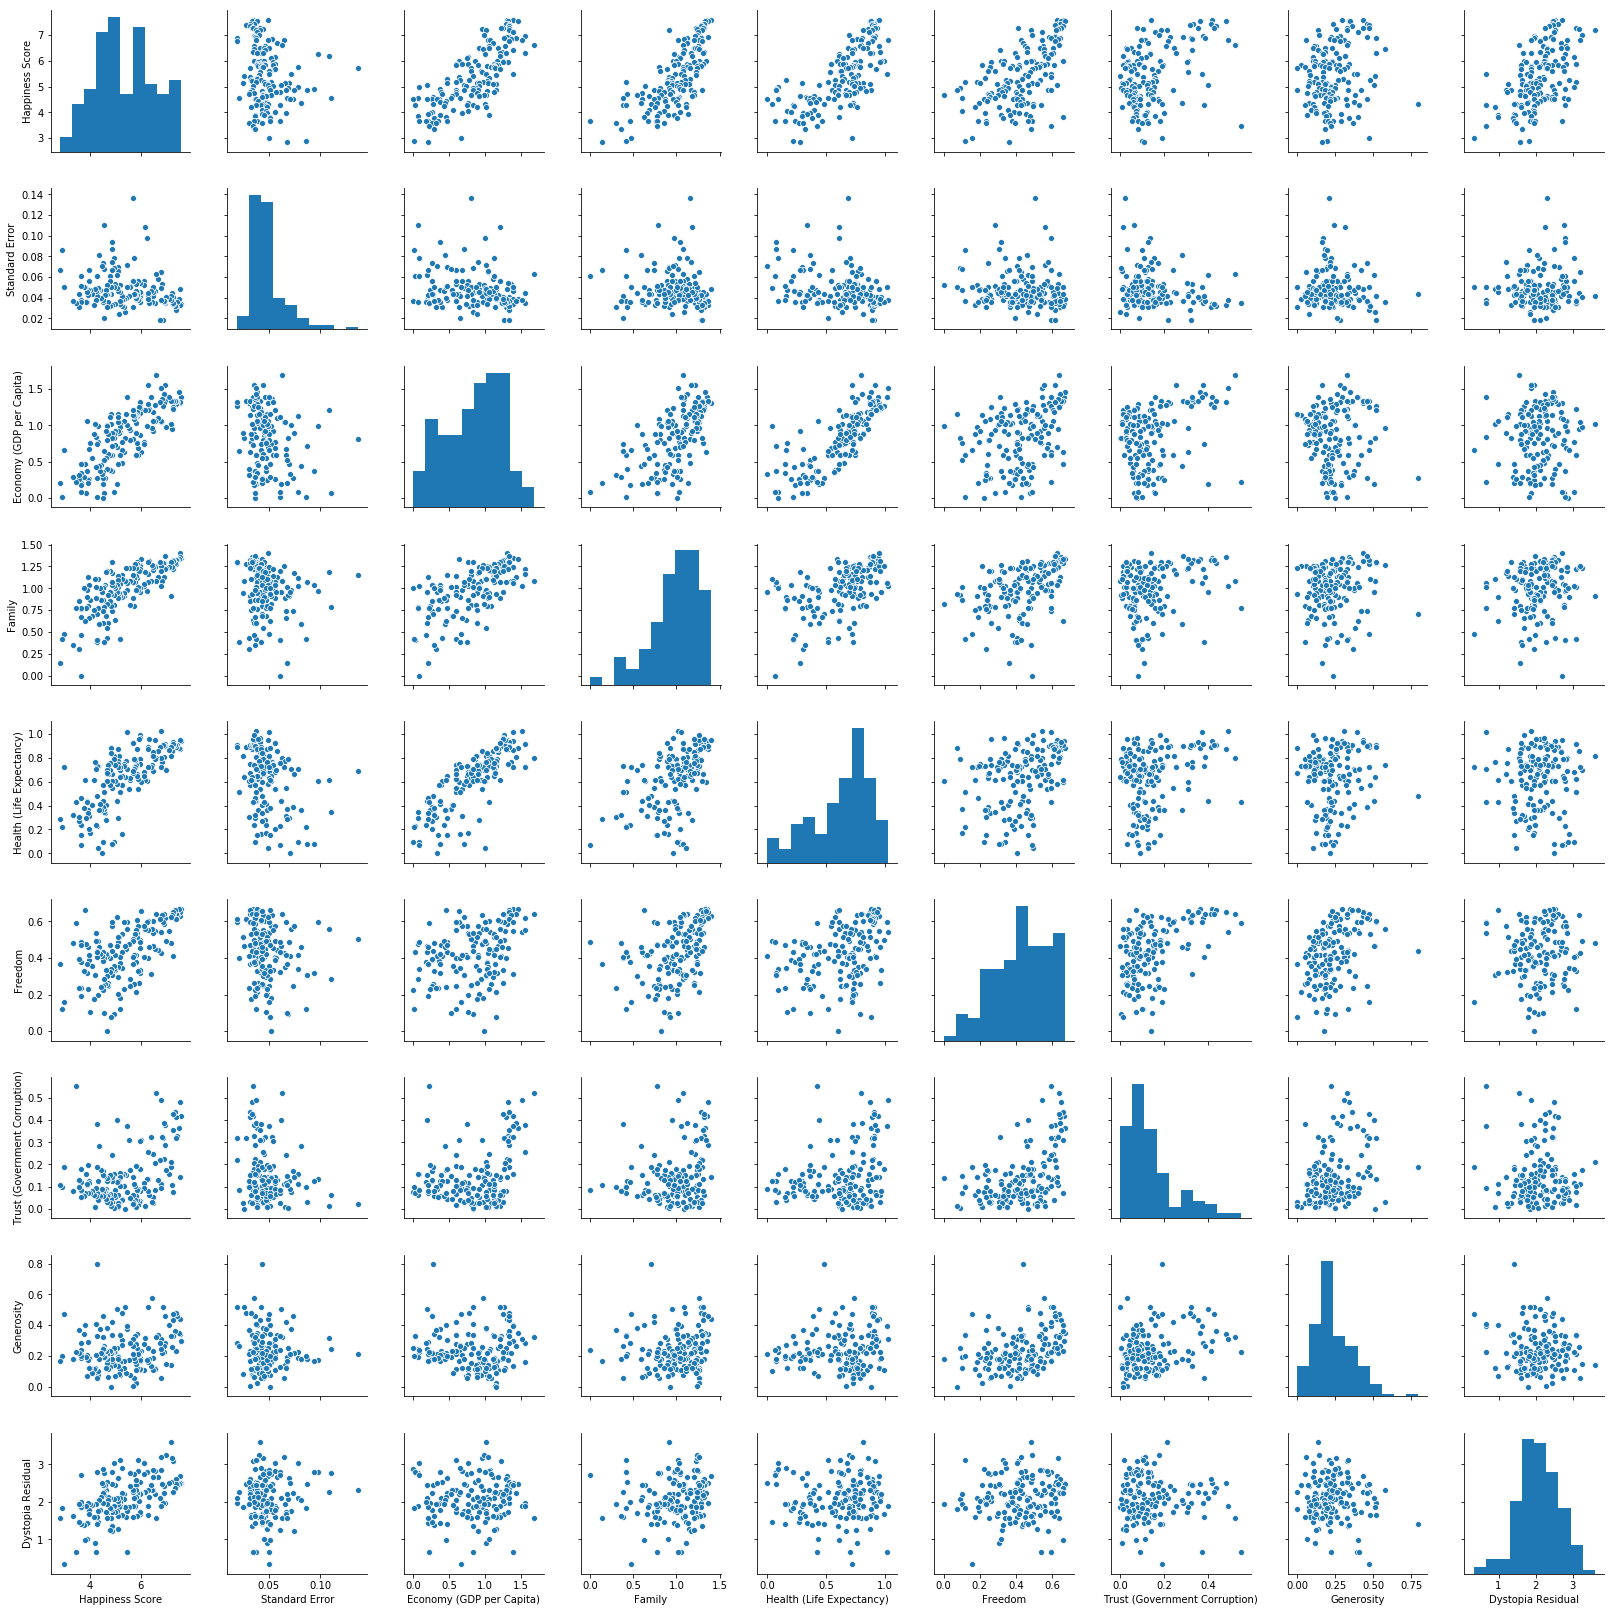

In [81]:
sns.pairplot(df_new)

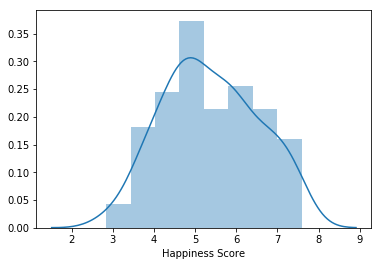

In [82]:
sns.distplot(df_new["Happiness Score"])

In [86]:
#Splitting the independent and target variables in x & y
x=df_new.drop("Happiness Score",axis=1)
y=df_new["Happiness Score"]

In [87]:
#Checking skewness
x.skew()

Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

As in data values skewness is greater than 0.5 therefore skewness is there

In [88]:
#Checking Outliers
from scipy.stats import zscore
zscr=np.abs(zscore(x))

threshold=3
print(np.where(zscr>3))

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([5, 0, 0, 0, 6, 2, 5, 7, 2], dtype=int64))


In [89]:
#Removing Outliers
df_new1=df_new[(zscr<3).all(axis=1)] 

In [90]:
df_new1.shape

(149, 9)

## Train Test Split

In [91]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [92]:
x_train.shape

(126, 8)

In [93]:
x_test.shape

(32, 8)

In [94]:
y_train.shape

(126,)

In [95]:
y_test.shape

(32,)

In [96]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [97]:
lm.coef_

array([-8.43800041e-04,  1.00012621e+00,  9.99967750e-01,  9.99890495e-01,
        9.99843219e-01,  9.99964732e-01,  9.99902745e-01,  1.00002938e+00])

In [98]:
lm.intercept_

5.446689922550263e-05

In [99]:
lm.score(x_train,y_train)

0.9999999391945544

In [100]:
#predict the value
pred=lm.predict(x_test)
print("Happiness Score:",pred)
print("Happiness Score",y_test)

Happiness Score: [4.3068948  5.98711048 4.19427325 2.90449794 5.05719348 6.57408073
 4.89750236 4.87598661 4.94867686 3.93079047 6.90138435 5.82828326
 6.98260635 5.54817454 6.78625304 6.50511133 4.5071714  4.68555384
 4.97107435 5.69530337 3.65507055 6.93738926 7.19985003 7.28401364
 6.4851446  5.19231558 5.88899588 3.95561644 4.3691434  3.68084808
 3.78076713 5.33249315]
Happiness Score 128    4.307
45     5.987
134    4.194
156    2.905
90     5.057
29     6.574
96     4.898
98     4.876
95     4.949
140    3.931
19     6.901
56     5.828
15     6.983
69     5.548
24     6.786
30     6.505
122    4.507
109    4.686
93     4.971
65     5.695
150    3.655
18     6.937
12     7.200
9      7.284
31     6.485
81     5.192
51     5.889
139    3.956
125    4.369
146    3.681
145    3.781
75     5.332
Name: Happiness Score, dtype: float64


In [101]:
print('error:')

print('Mean Absolute error: ',mean_absolute_error(y_test,pred))

print('Mean Squared error: ',mean_squared_error(y_test,pred))

print('Root Mean Squared error: ',np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean Absolute error:  0.00023115512532792537
Mean Squared error:  7.480577343240853e-08
Root Mean Squared error:  0.0002735064412996676


In [102]:
#r2 score --> coefficient of determination
#is the proportion of the variance in the dependent variable that is predictable from the independent variable(s)
#i.e. change coming in y whenever x is being changed
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.9999999472734886


In [103]:
#predict the Happiness Score by providing the values
t=np.array([0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176])

In [104]:
t.shape

(8,)

In [105]:
t=t.reshape(1,-1)
t.shape

(1, 8)

In [106]:
lm.predict(t)

array([7.42690667])

In [108]:
import joblib
joblib.dump(lm,"WorldHappinessReport.obj")

['WorldHappinessReport.obj']